<a href="https://colab.research.google.com/github/peterpanw/Imageclassifier/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

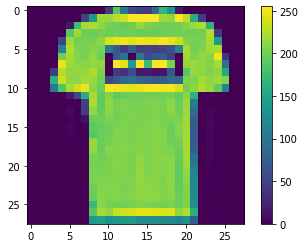

Epoch 1/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.4396 - accuracy: 0.8391
Epoch 2/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2931 - accuracy: 0.8932
Epoch 3/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2461 - accuracy: 0.9080
Epoch 4/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.2130 - accuracy: 0.9194
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2568 - accuracy: 0.9043


9

In [3]:
#标签分类
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#加载数据集
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

#数据预处理
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

#构造神经元模型
#增加卷积层
model=keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #分类器
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

#训练评估模型

train_images_scaled=train_images/255 #此处为了训练效果更好使其为0-1之间的数

model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(train_images_scaled.reshape(-1,28,28,1),train_labels,epochs=5)

#评估
test_images_scaled=test_images/255
model.evaluate(test_images_scaled.reshape(-1,28,28,1),test_labels)

#预测
#可以附加一个 softmax 层，将 logits 转换成更容易理解的概率
import numpy as np
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

#预测测试集中所有模型的标签
predictions = probability_model.predict(test_images_scaled.reshape(-1,28,28,1))

np.argmax(predictions[0]) #查看置信度最大的标签
test_labels[0]


